In [4]:
import sys
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell
from ase.build import sort
from ase.geometry import get_layers
import Tools as tl
from ase.visualize import view

## Creo celda ZrO2 2x2 en el plano 1 0 -1 0 y un sitio tipo 'hollow1'

In [5]:
zro2 = read_vasp('Structure/POSCAR')
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


In [7]:
ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]
ZrO2001Oterm_2x2 = sort(ZrO2001Oterm_2x2_unsorted[0])
layer, height = get_layers(ZrO2001Oterm_2x2, (0,0,1), tolerance=0.7)
h_sitios = max(height)
h_bridge = ZrO2001Oterm_2x2.positions.max(axis=0)[-1]
bridge = ZrO2001Oterm_2x2.positions[layer == 14].mean(axis=0)[:2]

bridge = np.append(bridge, h_bridge) #h_sitios)
ZrO2001Oterm_2x2.info = {'adatom': {'top': {'bridge': bridge}}}
onbridge = tl.make_adstruc(ZrO2001Oterm_2x2, 'bridge', thesite='bridge', theface='top',)
tl.get_adsite(ZrO2001Oterm_2x2,'bridge','top')

{'top': {'bridge': array([ 0.        ,  3.63419899, 35.22092906])}}

## Creo celda Zr 1x1, roto, hago simetria, agrego sitio tipo "bridge"

In [8]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)
Zr10m10 = surfaces_with_termination(zrortho, (0, 1, 0), 5, vacuum=10, termination='Zr')[0]
zrsymmetric = tl.make_symmetric(Zr10m10,natoms=3)
Zr10m10_2x2_unsorted = make_supercell(zrsymmetric,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True)
Zr10m10_2x2 = sort(Zr10m10_2x2_unsorted)

In [9]:
view(Zr10m10_2x2)

<Popen: returncode: None args: ['C:\\WPy64-39100\\python-3.9.10.amd64\\pytho...>

El loop que había en las ramas anteriores estaba bien, pero había que cambiar el orden de las cosas y aprobecho para ordenar todo un poco

Los angulos a considerar para las rotaciones son:

In [10]:
angs = np.linspace(0,45,4)

In [11]:
notyetrotated = [Zr10m10_2x2.copy() for ang in angs]

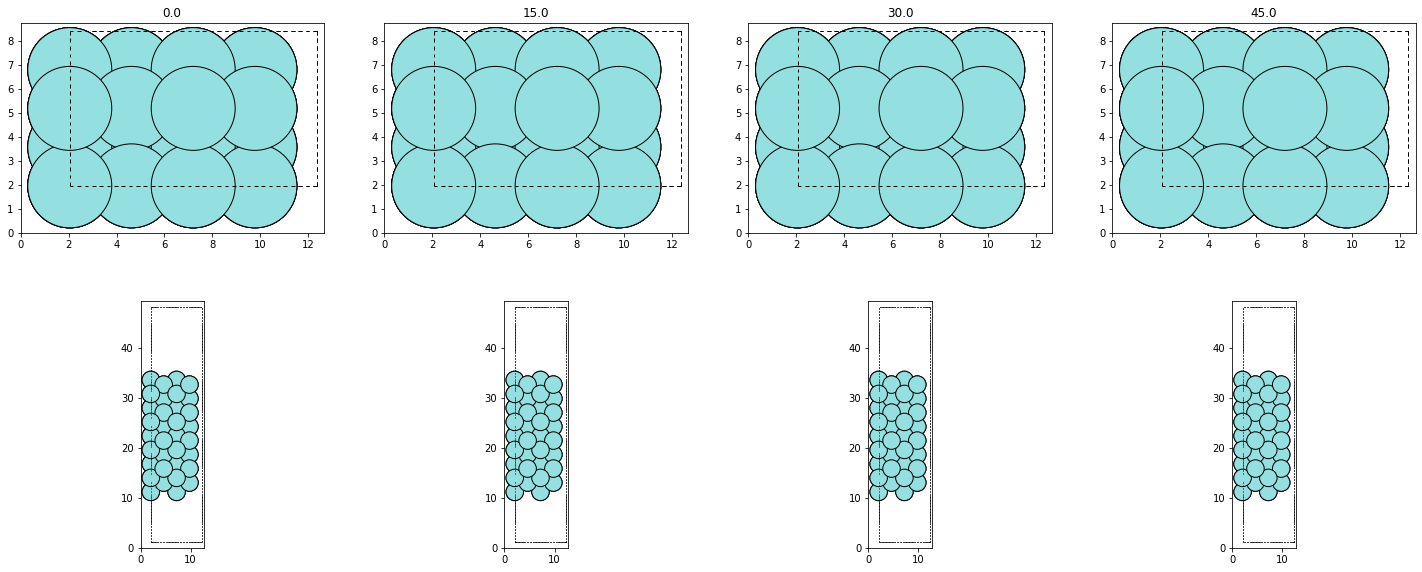

In [12]:
tl.plotcases(notyetrotated, angs)

In [13]:
scaled_rotated = [tl.scalecell(thisatoms, Zr10m10_2x2.cell.copy()) for thisatoms in notyetrotated]

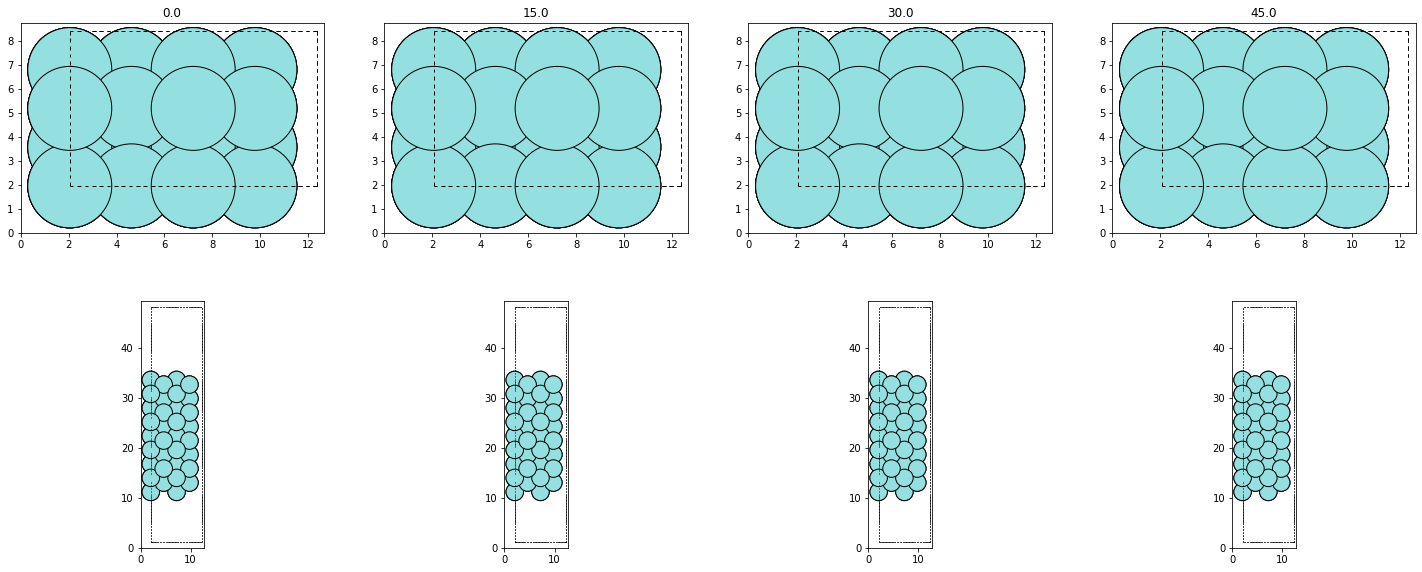

In [14]:
tl.plotcases(scaled_rotated,angs)

In [15]:
dotherotations =  [thiscaled.rotate(ang,'z') for thiscaled, ang in zip(scaled_rotated, angs)]

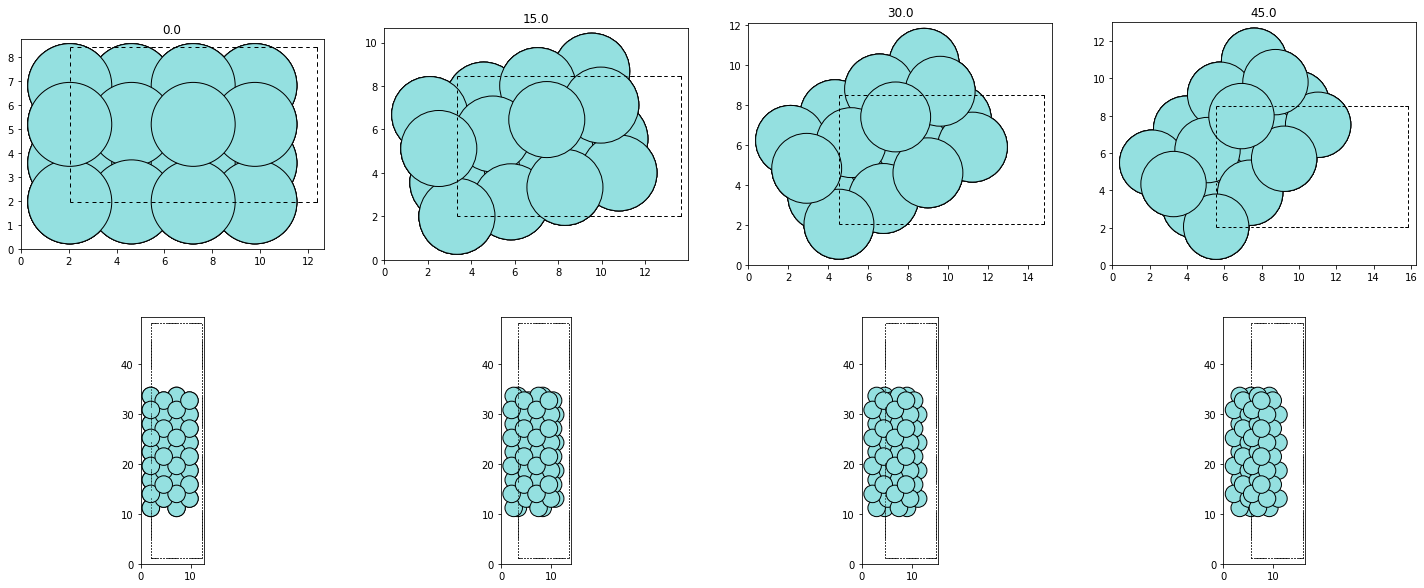

In [16]:
tl.plotcases(scaled_rotated, angs)

In [17]:
getsites = [tl.get_adsite(this,face='bottom', site='top') for this in scaled_rotated]

In [19]:
thestack, part1, part2 = tl.stack(ZrO2001Oterm_2x2, scaled_rotated[0], 'bridge', 'top', 4, return_parts = True)

total_height  [ 0.          0.         49.58319138]


In [20]:
thestack.wrap(pretty_translation=True)

In [21]:
view(thestack)

<Popen: returncode: None args: ['C:\\WPy64-39100\\python-3.9.10.amd64\\pytho...>

tl.plotviews(thestack)